In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sqlalchemy import create_engine
engine = create_engine("sqlite:///bankinganalysis.db",echo = False)
import sqlite3
conn=  sqlite3.connect("bankinganalysis.db")

In [3]:
#file reading 
for file in os.listdir("Banking data"):
    print(file)

.ipynb_checkpoints
banking-clients.csv
banking-realtionships.csv
gender.csv
investment-advisiors.csv


#### **Ingestion Function**

In [4]:
def ingest_db(df, table_name, engine):
    df.to_sql(table_name, con= engine, if_exists = 'replace', index = False)
for file in os.listdir('Banking data'):
    if file.endswith('.csv'):
        path = os.path.join('Banking data', file)
        df = pd.read_csv(path)
        print(df.shape)
        ingest_db(df, file[:-4], engine)

(3000, 25)
(4, 2)
(2, 2)
(22, 2)


In [4]:
df.head()

,IAId,Investment Advisor
0,1,Victor Dean
1,2,Jeremy Porter
2,3,Ernest Knight
3,4,Eric Shaw
4,5,Kevin Kim


In [13]:
pd.read_sql_query("""select name from sqlite_master where type = 'table'""",conn)

,name
0,banking_client
1,banking_realtionships
2,gender
3,investment_advisiors


In [12]:
cursor = conn.cursor()
cursor.execute('Alter table "banking-clients" rename to banking_client')
cursor.execute('Alter table "banking-realtionships" rename to banking_realtionships')
cursor.execute('Alter table "investment-advisiors" rename to investment_advisiors')
conn.commit()



In [5]:
banking_client = pd.read_sql_query("select * from banking_client",conn)
banking_client

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,09-10-2014,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,1089957.03,532867.88,657849.62,12947.31,1238859.91,1,3,3,2,4
2996,IND40556,Billy Williamson,44,32837,05-02-2009,Dennis Ruiz,European,Paralegal,Mid,Gold,...,136891.32,56581.74,93195.61,23205.69,277171.07,1,2,3,2,5
2997,IND72414,Victor Black,70,36088,29-12-2009,Joshua Ryan,American,Statistician IV,Low,Jade,...,214860.89,158726.06,35539.15,30291.81,502947.22,2,2,3,2,6
2998,IND46652,Andrew Ford,56,24871,13-02-2006,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,742630.22,404638.26,56411.33,6413.14,1538368.60,3,1,3,2,7


In [17]:
banking_client.describe(include = 'all')

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000,3000,3000.000000,3000.000000,3000,3000,3000,3000,3000,3000,...,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
unique,2940,2913,NaN,NaN,2579,49,5,195,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IND48103,Raymond Mills,NaN,NaN,03-02-2020,Ernest Rivera,European,Structural Analysis Engineer,High,Jade,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,2,NaN,NaN,4,77,1309,28,1476,1331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,51.039667,21563.323000,NaN,NaN,NaN,NaN,NaN,NaN,...,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,NaN,NaN,19.854760,12462.273017,NaN,NaN,NaN,NaN,NaN,NaN,...,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,NaN,NaN,17.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,34.000000,10803.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,NaN,NaN,51.000000,21129.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,NaN,NaN,69.000000,32054.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000


In [12]:
banking_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client ID                 3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location ID               3000 non-null   int64   
 4   Joined Bank               3000 non-null   object  
 5   Banking Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee Structure             3000 non-null   object  
 9   Loyalty Classification    3000 non-null   object  
 10  Estimated Income          3000 non-null   float64 
 11  Superannuation Savings    3000 non-null   float64 
 12  Amount of Credit Cards    3000 non-null   int64   
 13  Credit Card Balance       3000 non-null   float6

In [11]:
banking_client.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [10]:
#converting numerical data to categorical data (Estimated Income) 

bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med',  'High'] 

banking_client['Income Band'] = pd.cut(banking_client['Estimated Income'], bins = bins, labels = labels, right = False)

<Axes: >

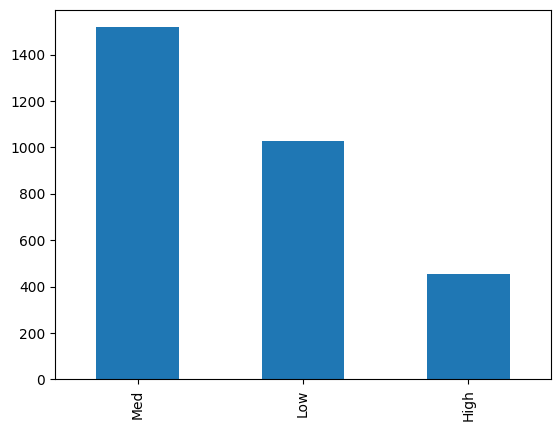

In [19]:
banking_client['Income Band'].value_counts().plot(kind = 'bar')

In [20]:
banking_client.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band'],
      dtype='object')

In [26]:
#Examine the distribution of unique categories in categorical columns 
categorical_cols=  banking_client[['Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band','Loyalty Classification',
        'Nationality', 'Occupation', 'Fee Structure','Amount of Credit Cards','Properties Owned']]

#### **Univariate Analysis** (Analyzing one column at a time)

In [27]:
for col in categorical_cols:
    print(f"Value count for '{col}':")
    display(banking_client[col].value_counts())

Value count for 'Properties Owned':


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64

Value count for 'Risk Weighting':


2    1222
1     836
3     460
4     322
5     160
Name: Risk Weighting, dtype: int64

Value count for 'BRId':


3    1352
1     660
2     495
4     493
Name: BRId, dtype: int64

Value count for 'GenderId':


2    1512
1    1488
Name: GenderId, dtype: int64

Value count for 'IAId':


1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: IAId, dtype: int64

Value count for 'Income Band':


Med     1517
Low     1027
High     456
Name: Income Band, dtype: int64

Value count for 'Loyalty Classification':


Jade        1331
Silver       767
Gold         585
Platinum     317
Name: Loyalty Classification, dtype: int64

Value count for 'Nationality':


European      1309
Asian          754
American       507
Australian     254
African        176
Name: Nationality, dtype: int64

Value count for 'Occupation':


Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: Occupation, Length: 195, dtype: int64

Value count for 'Fee Structure':


High    1476
Mid      962
Low      562
Name: Fee Structure, dtype: int64

Value count for 'Amount of Credit Cards':


1    1922
2     765
3     313
Name: Amount of Credit Cards, dtype: int64

Value count for 'Properties Owned':


2    777
1    776
3    742
0    705
Name: Properties Owned, dtype: int64

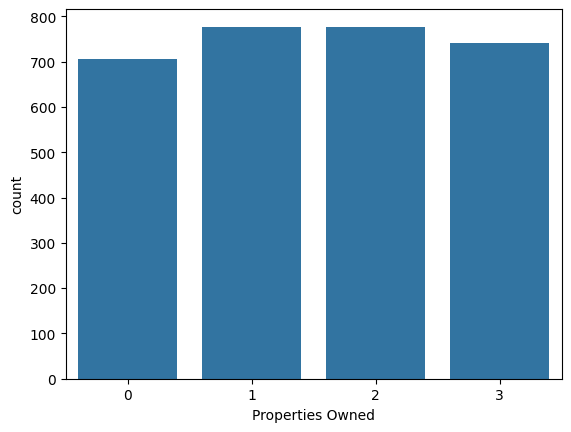

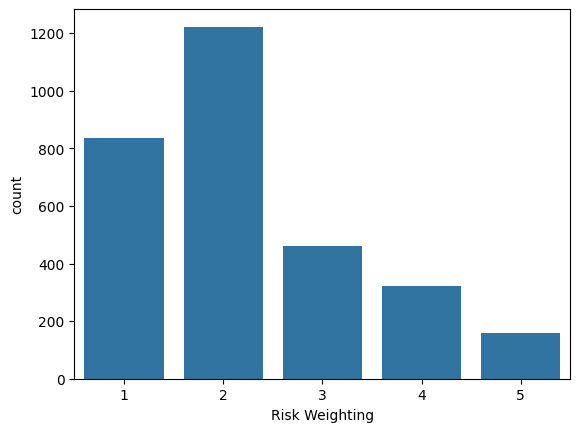

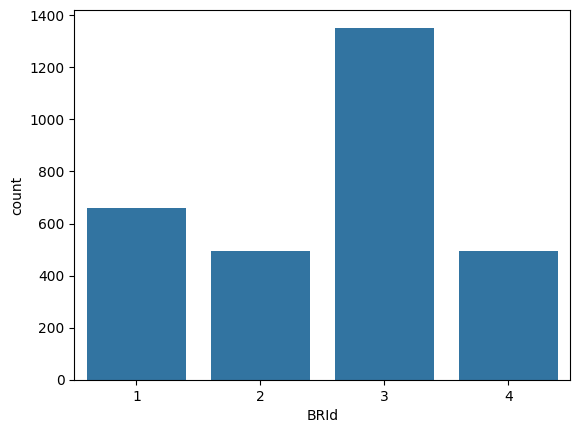

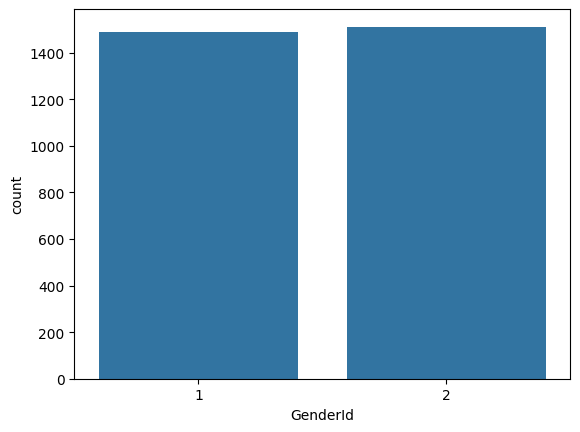

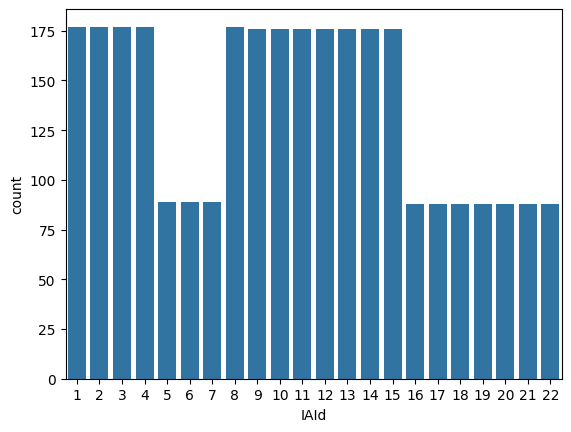

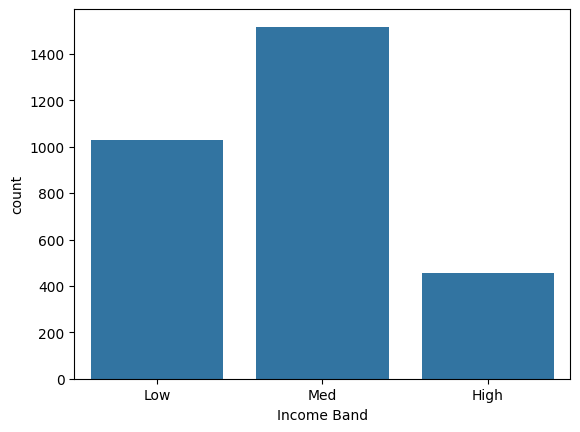

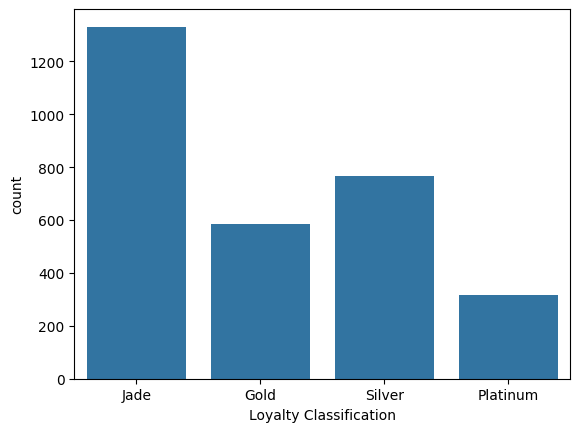

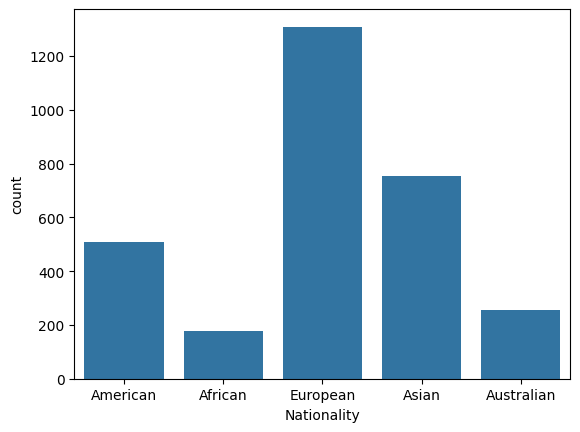

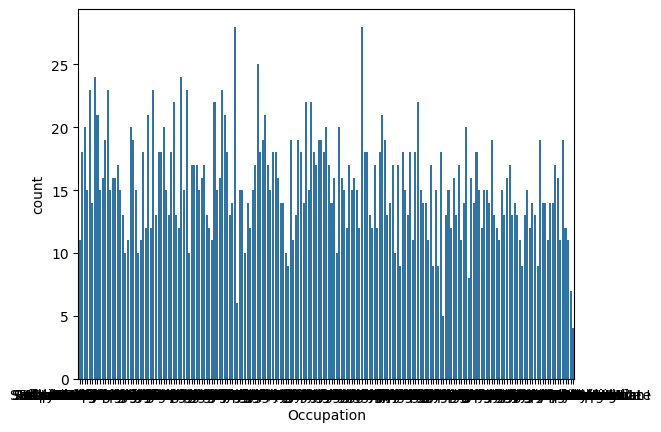

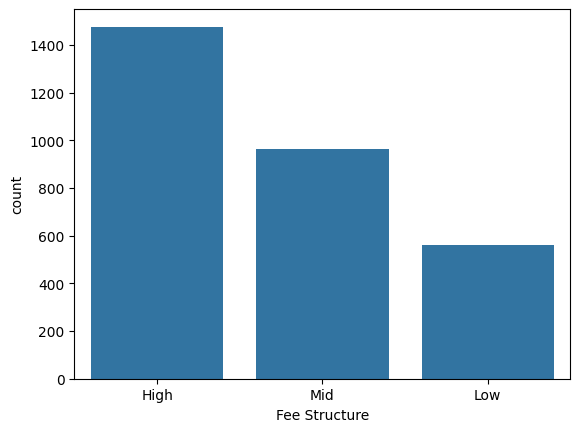

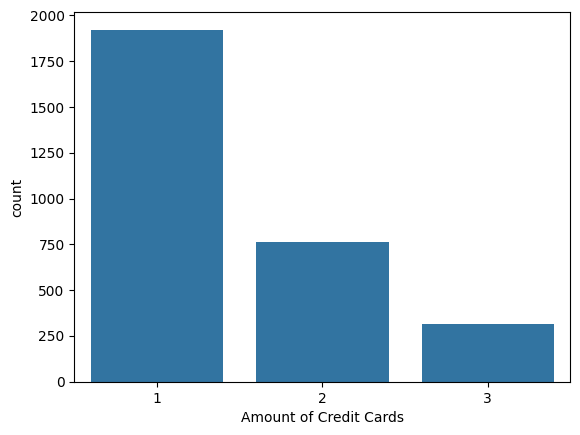

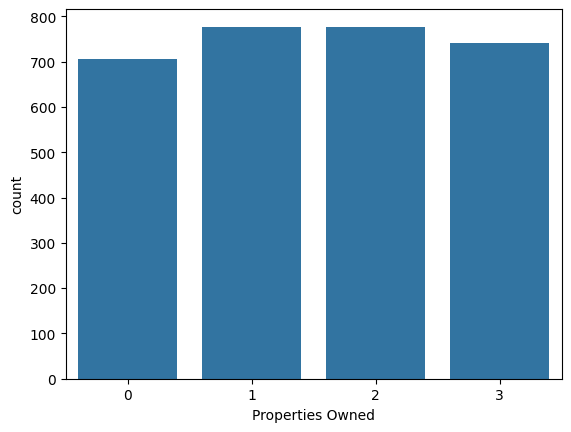

In [29]:
for i, predictor in enumerate(banking_client[['Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band','Loyalty Classification',
        'Nationality', 'Occupation', 'Fee Structure','Amount of Credit Cards','Properties Owned']]):
    plt.figure(i)
    sns.countplot(data = banking_client, x = predictor,)

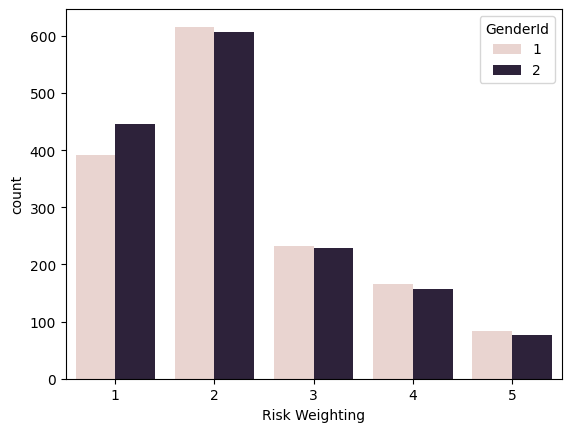

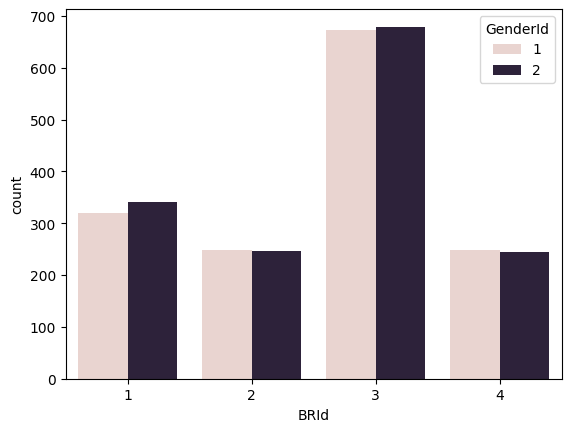

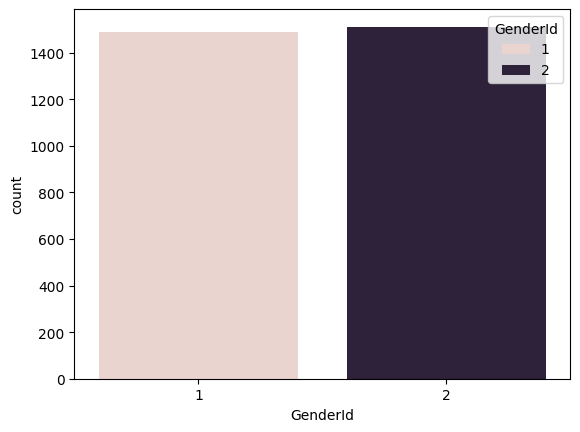

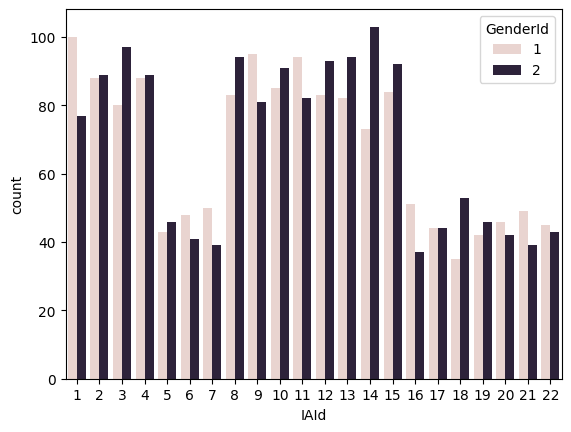

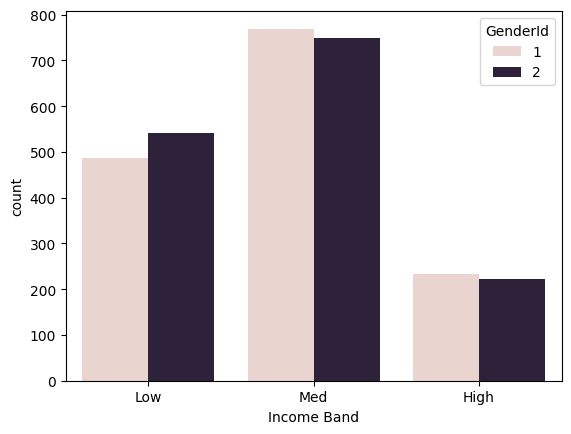

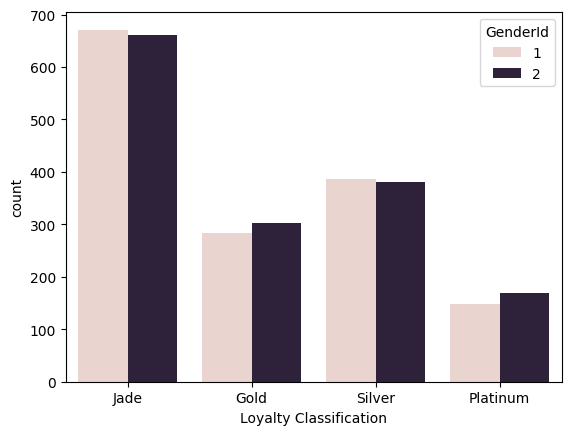

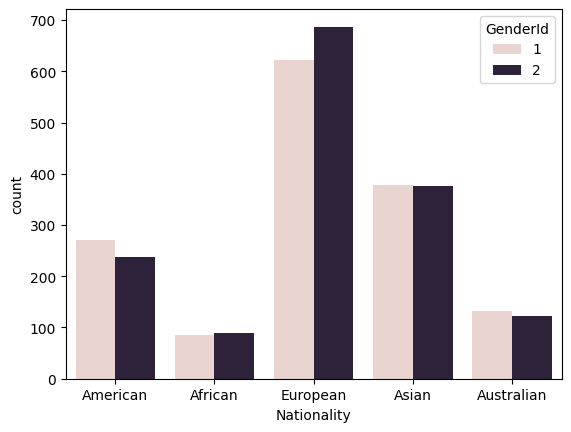

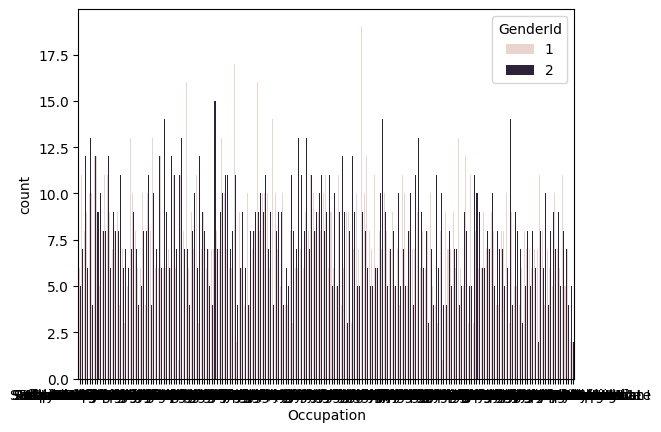

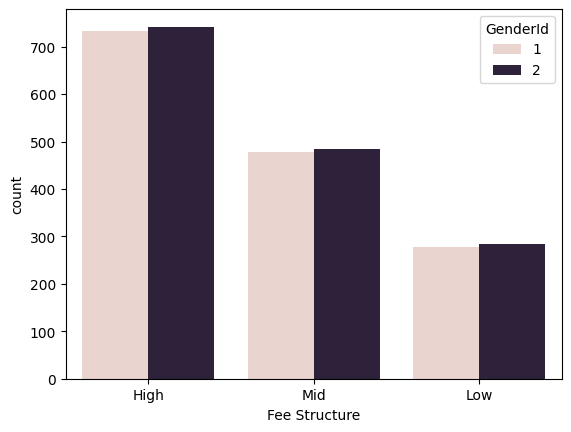

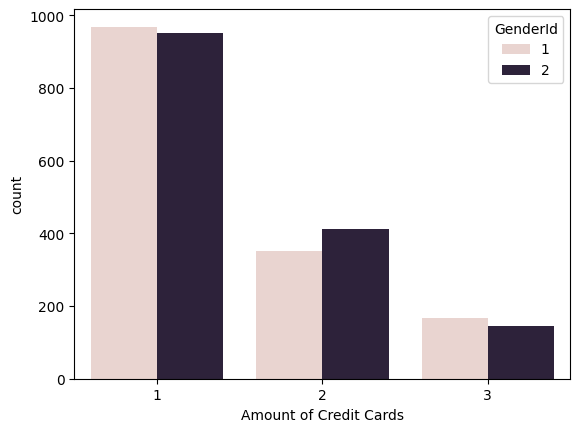

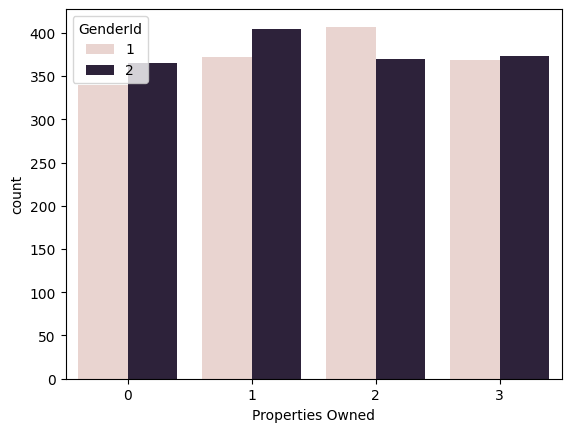

In [30]:
for i, predictor in enumerate(banking_client[[
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band','Loyalty Classification',
        'Nationality', 'Occupation', 'Fee Structure','Amount of Credit Cards','Properties Owned']]):
    plt.figure(i)
    sns.countplot(data = banking_client, x = predictor, hue = 'GenderId')


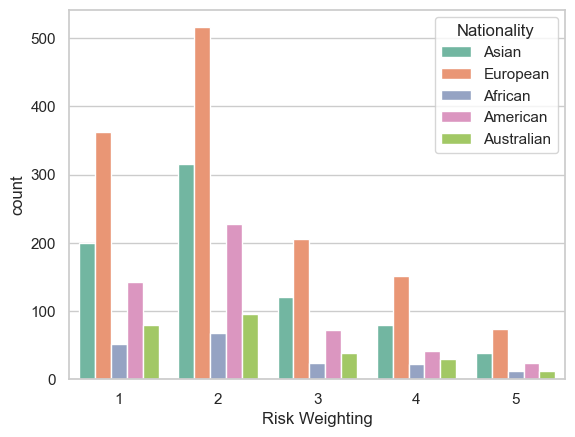

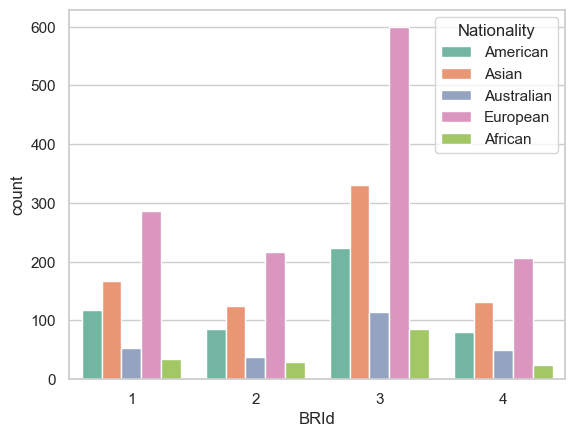

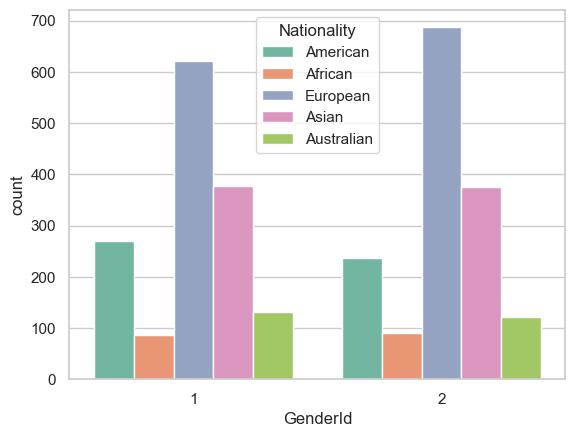

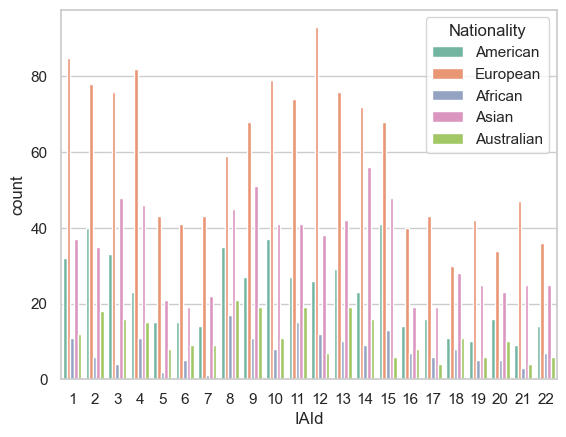

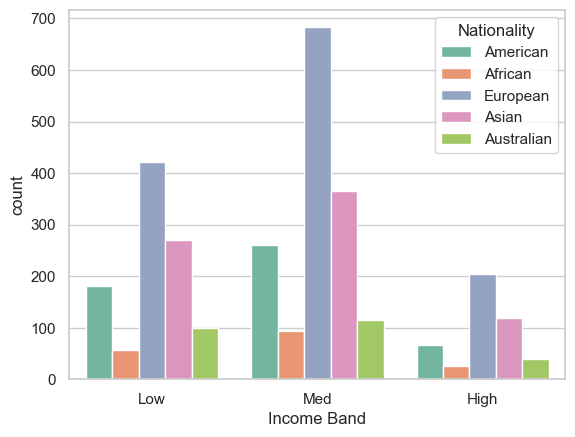

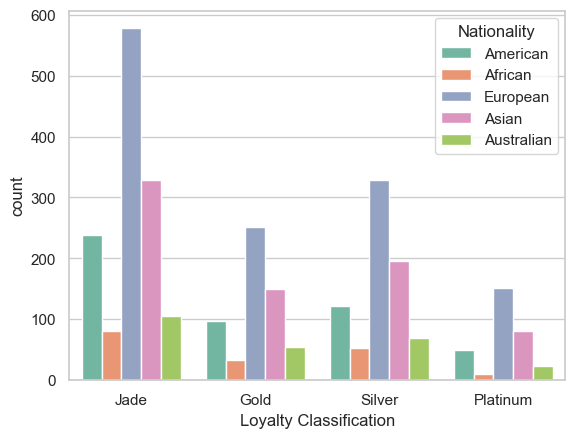

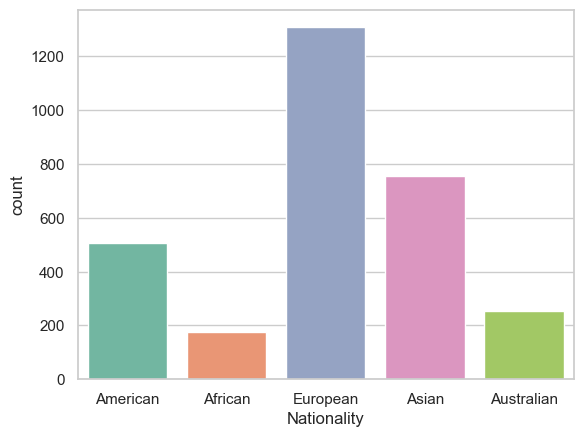

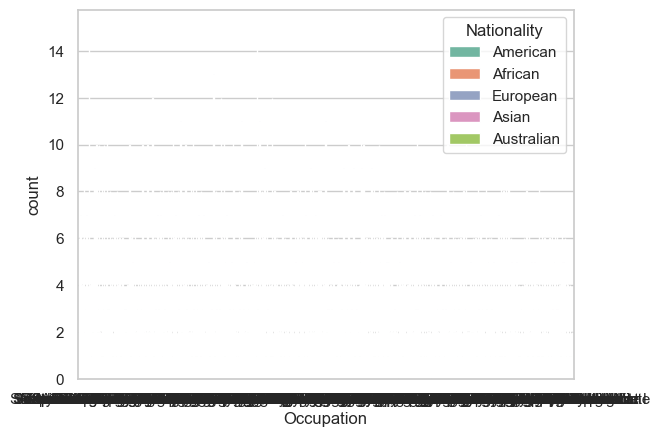

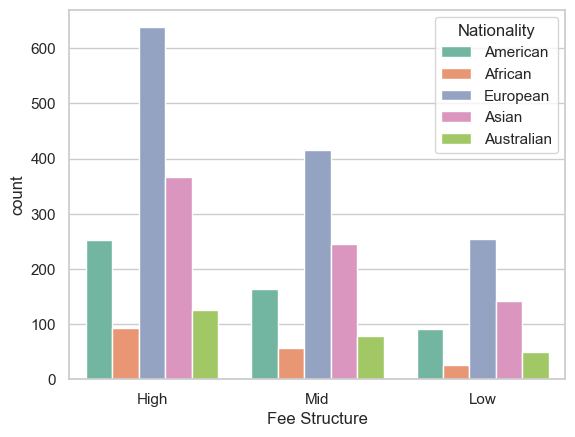

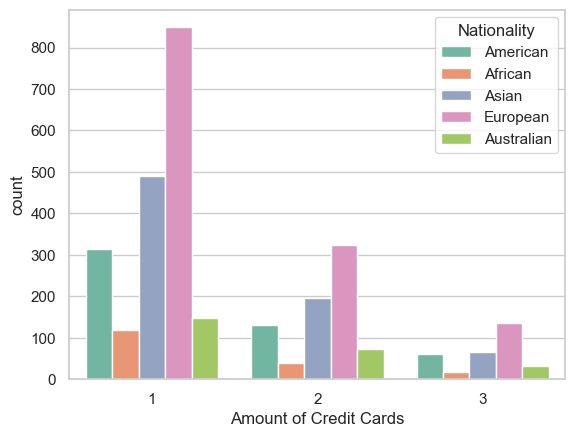

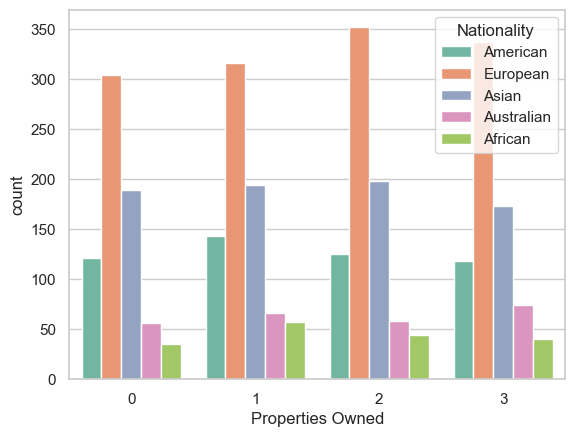

In [32]:
#### **Bivariate Analysis on Nationality 
for i, predictor in enumerate(banking_client[[ 'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band','Loyalty Classification',
        'Nationality', 'Occupation', 'Fee Structure','Amount of Credit Cards','Properties Owned']]):
    plt.figure(i)
    sns.countplot(data = banking_client, x = predictor, hue = 'Nationality')


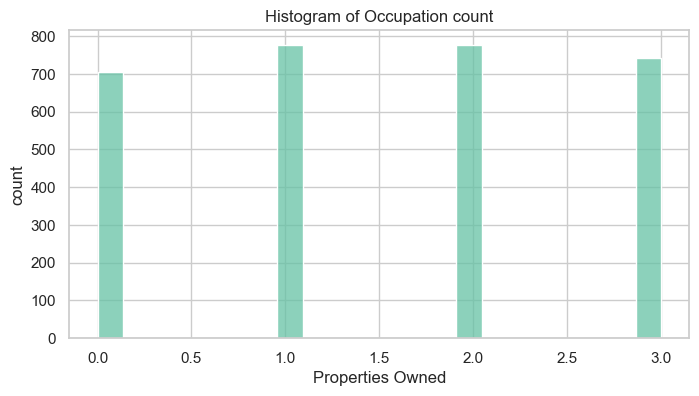

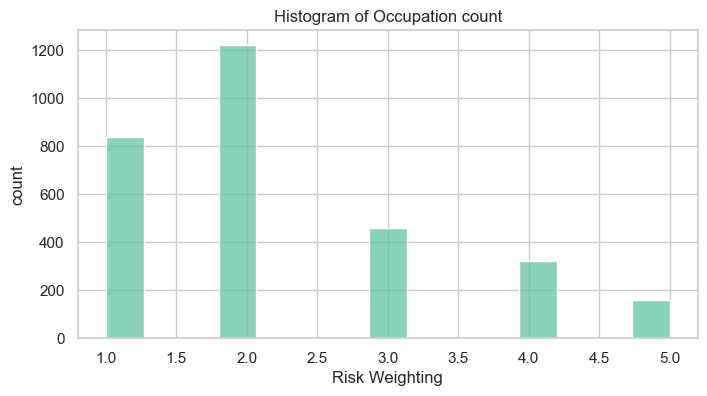

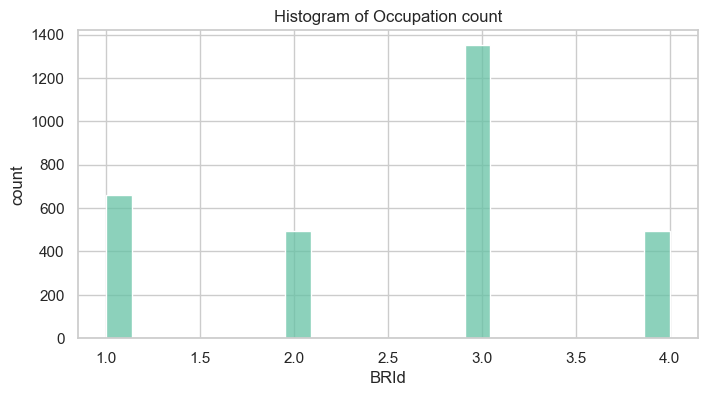

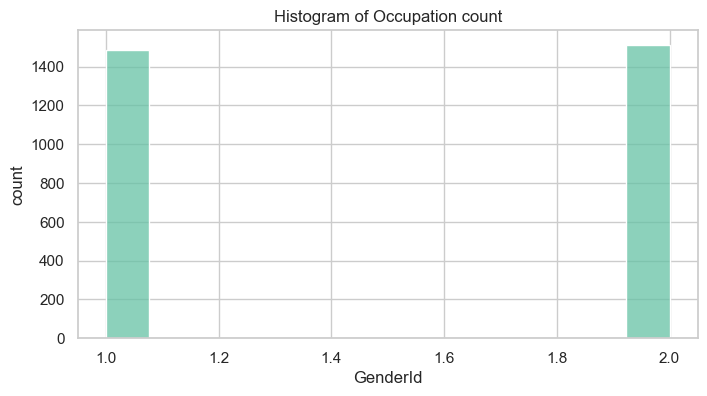

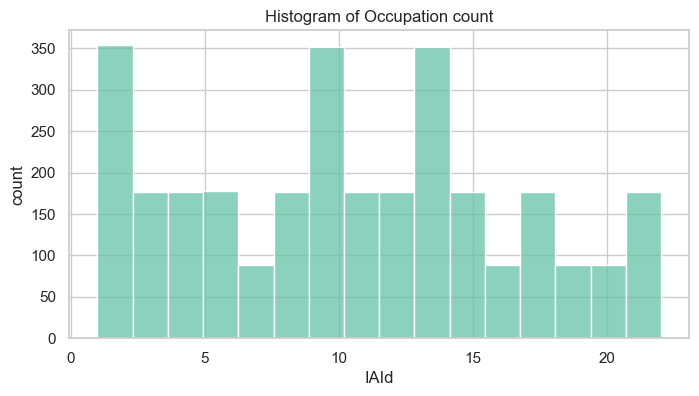

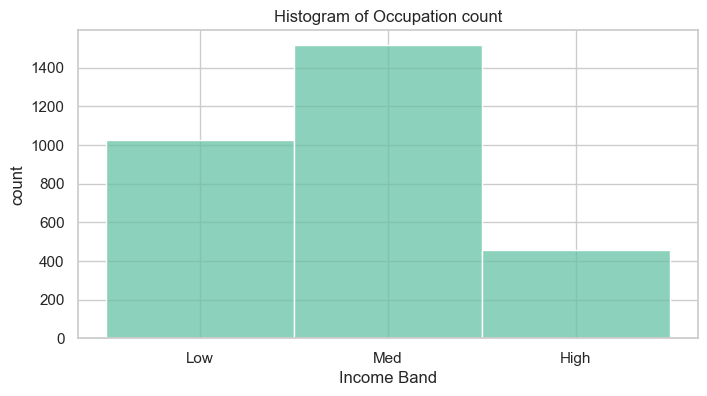

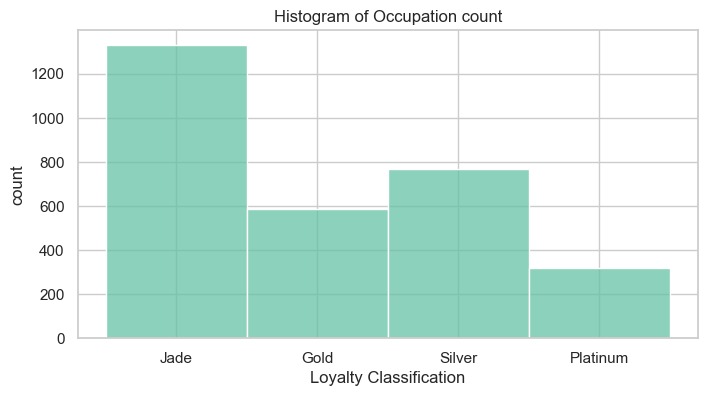

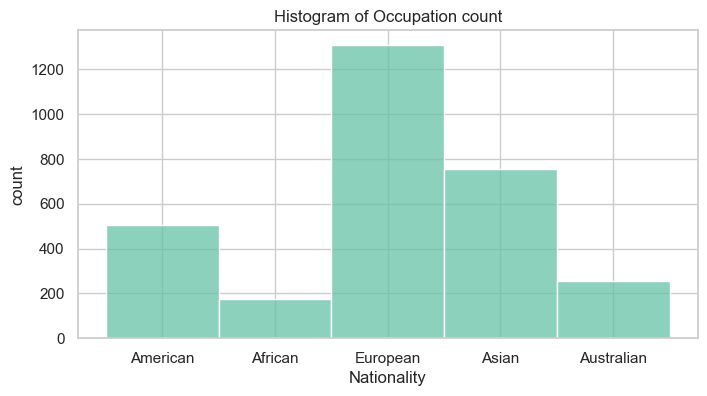

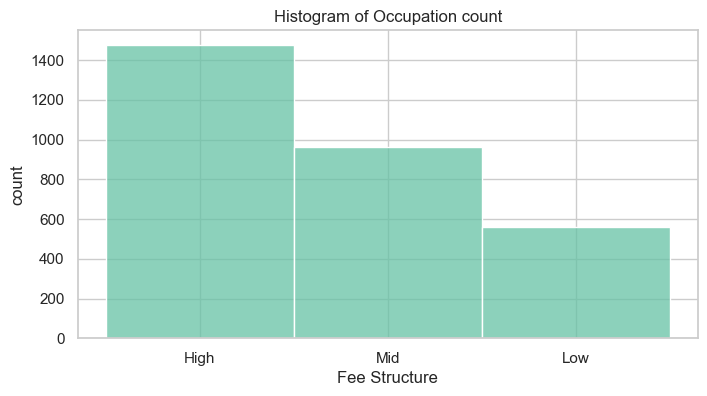

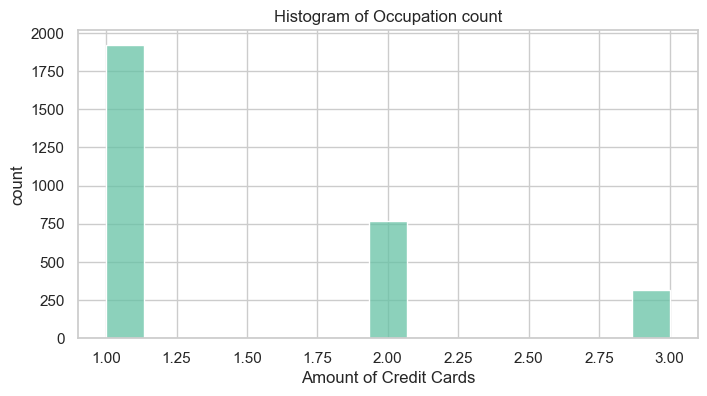

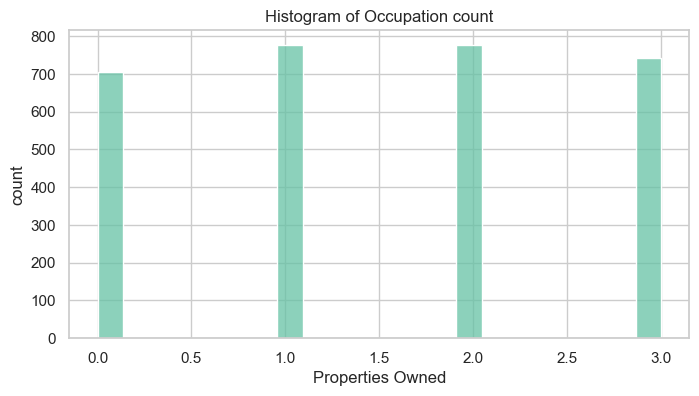

In [36]:
#Histplot of value counts for different occupations 
for col in categorical_cols:
    if col == "Occupation":
        continue 
    plt.figure(figsize = (8,4))
    sns.histplot(banking_client[col])
    plt.title("Histogram of Occupation count")
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

## **Numerical Analysis**

In [38]:
banking_client.columns

Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band'],
      dtype='object')

In [39]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans','Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending' ]

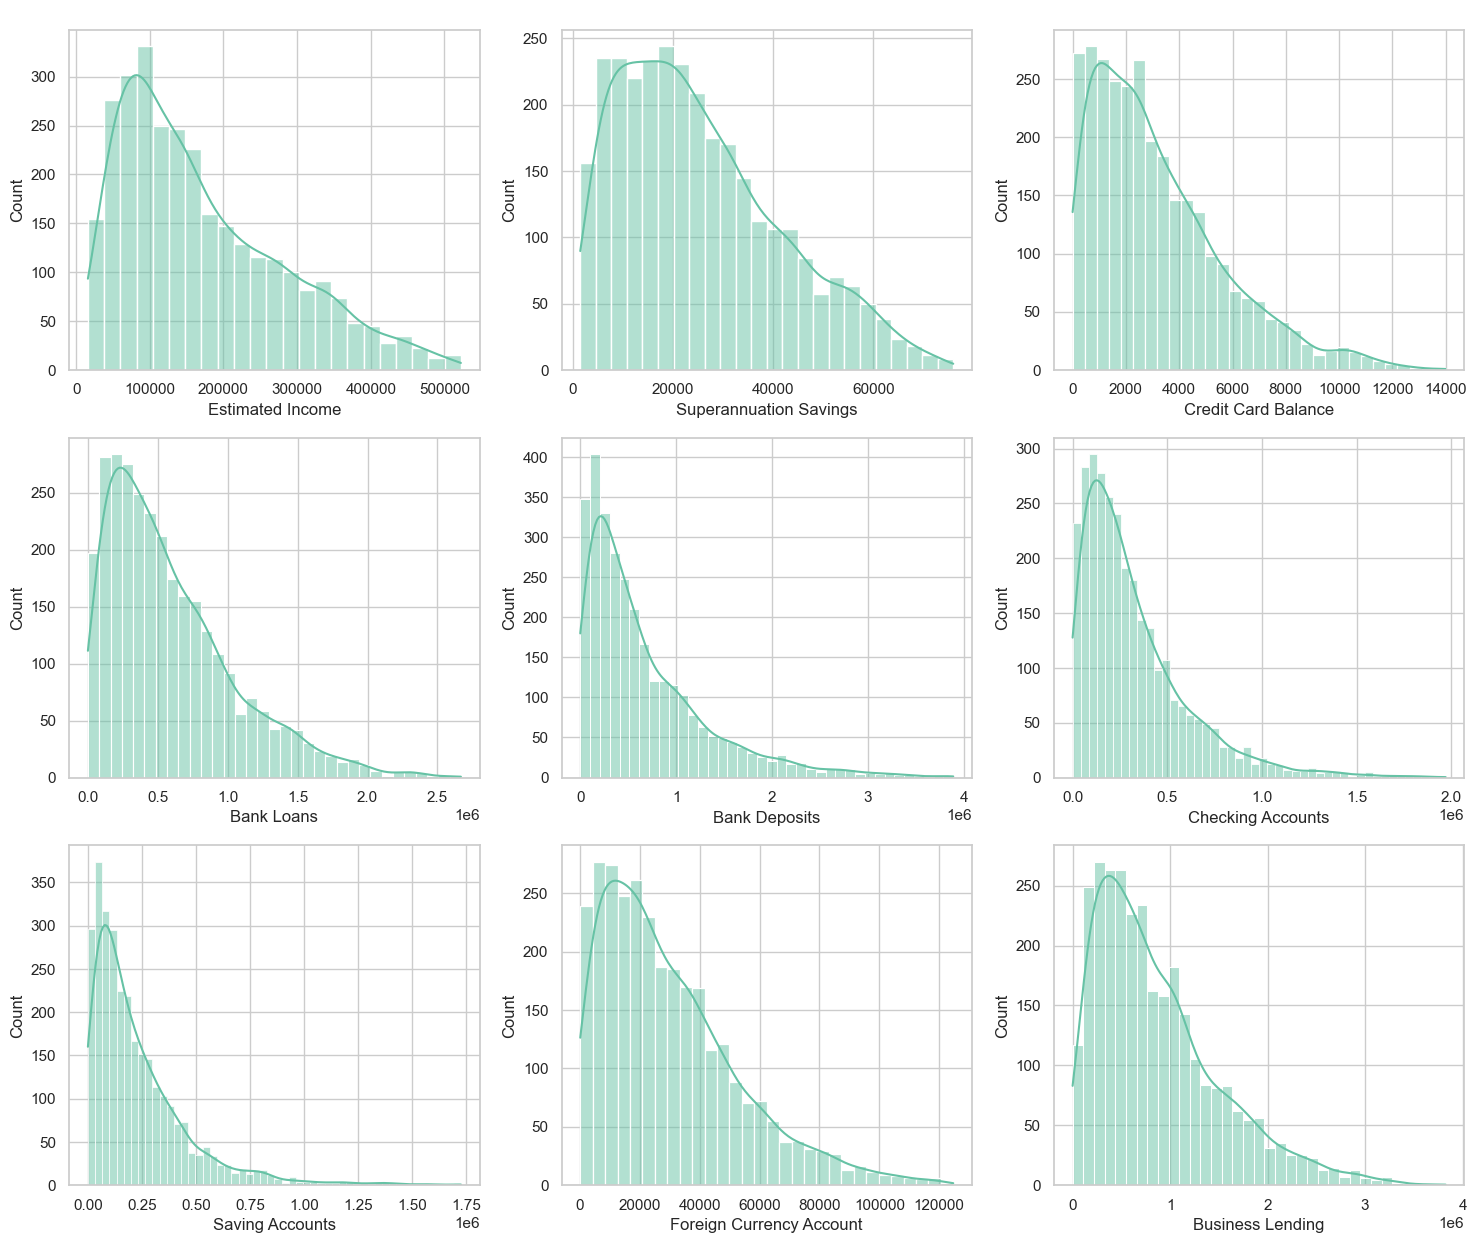

In [46]:
#Univariate analysis & visualization 
plt.figure(figsize = (18,15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(banking_client[col], kde=True)
    plt.title(" ")
plt.show ()   

#### **Heatmaps**
To see the correlation between all the numerical attributes

<function matplotlib.pyplot.show(close=None, block=None)>

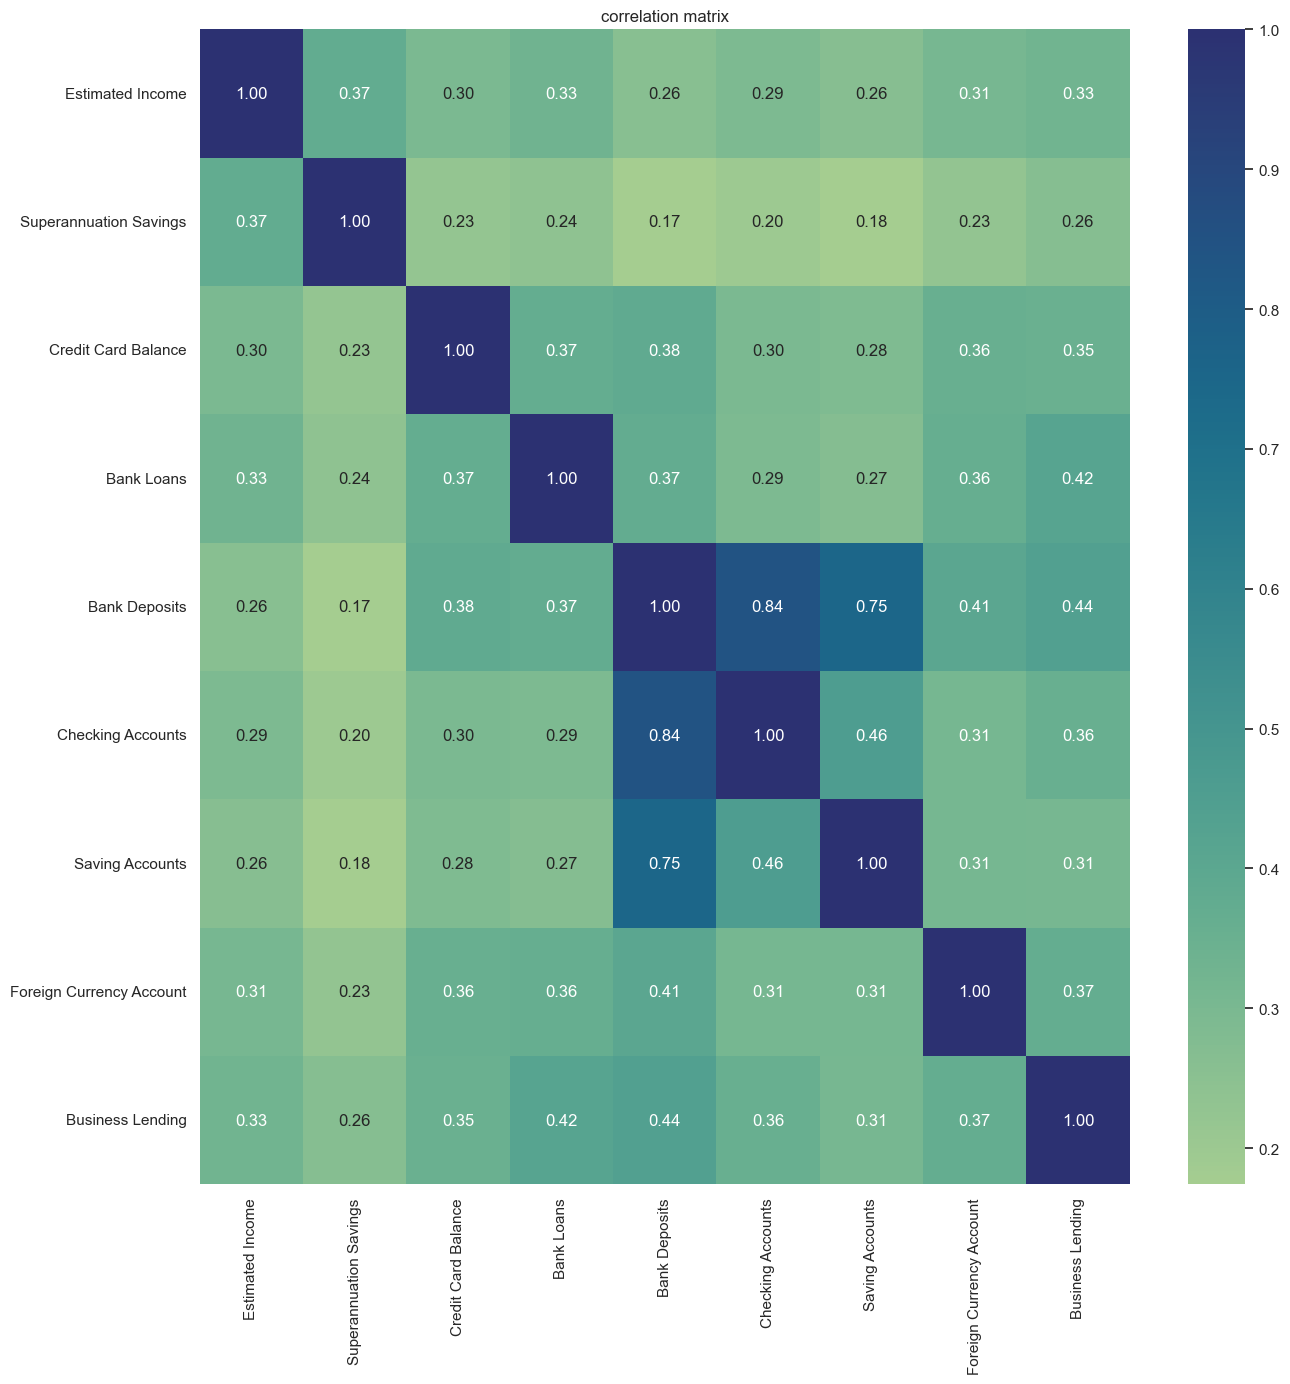

In [54]:
correlation_matrix = banking_client[numerical_cols].corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("correlation matrix")
plt.show

Customers with high deposits also keep high balances in checking and savings Accounts. 
#### **Insights**

**Financial Behavior**: Customers who maintain checking accounts are likely to have savings accounts and vice versa. This suggests that individuals who engage more with banking services tend to manage their finances through multiple accounts.

**Marketing Opportunities**: If there’s a strong correlation, it may present an opportunity for targeted marketing campaigns. For example, we
could promote savings account products to checking account holders to encourage them to save more.

**Risk Assessment**: High correlation may point to lower risk profiles for customers with both types of accounts. These customers might be more financially stable and responsible, making them more desirable for loans or credit products.

**Product Bundling**: The correlation suggests potential for bundling checking and savings accounts, which could enhance customer satisfaction and loyalty.

**Customer Segmentation**: we can use this insight to segment customers based on their account types, allowing for tailored services and communication.

**Behavioral Patterns**: It might indicate that customers are using checking accounts for daily transactions while saving in savings accounts, highlighting different financial behaviors.